In [7]:
import tensorflow as tf
import os.path
from glob import glob
from tqdm import tqdm
import scipy.misc
import random


import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
import numpy as np
import sys

#sys.path.append('vgg16-transfer-learning')
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.allow_soft_placement = True
config.log_device_placement = True


In [8]:
# load categories
with open('categories.txt') as f:
    cont = f.readlines()

cats = [x for x in cont]
print(len(cats))
print(cats[0])

# load labels
truth_text = dict()
truth_idx = dict()
import csv
with open('training_ground_truth.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader, None)  # skip the headers
    for row in reader:
        truth_text[row[0]]=cats[int(row[1])-1]
        truth_idx[row[0]]=int(row[1])-1
        
data_folder = 'training'
image_paths = glob(os.path.join(data_folder, 'training_*.jpg'))
image_shape = (224,224)

print('number of samples', len(image_paths))
print(set(truth_idx.values()))

200
person, individual, someone, somebody, mortal, soul

number of samples 80000
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199}


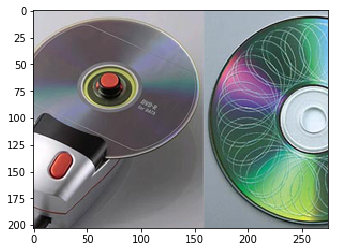

training_41471.jpg truth: compact disk, compact disc, CD
 61
training/training_41471.jpg training_41471.jpg


In [9]:
num = random.randint(1,len(image_paths)+1)
img_label = 'training_' + str(num).zfill(5) + '.jpg'
img_path = 'training/'+img_label
img=mpimg.imread(img_path)
plt.imshow(img)
plt.show()
print(img_label, 'truth:', truth_text[img_label], truth_idx[img_label])
print(img_path,os.path.basename(img_path))

## VGG16 (from Keras)
load it and test it

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.applications.resnet50 import decode_predictions

with tf.device('/device:GPU:0'):
    vgg_net = tf.keras.applications.VGG16(
        include_top=True,
        weights='imagenet',
        input_tensor=None,
        input_shape=None,
        pooling=None,
        classes=1000
    )

img_r = tf.keras.preprocessing.image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img_r)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
pred = vgg_net.predict(x)

idx = np.argmax(pred)
val = pred[0,idx]
print(val, 'at', idx)
decode_predictions(pred)

In [19]:
tf.keras.applications.vgg16.preprocess_input??
#tf.keras.preprocessing.image.img_to_array??

In [18]:
img_r = tf.keras.preprocessing.image.load_img(img_path, target_size=(224,224))
x0 = tf.keras.preprocessing.image.img_to_array(img_r)
x1 = np.expand_dims(x0, axis=0)
x2 = tf.keras.applications.vgg16.preprocess_input(x1)

x = x2
print(type(x),x.shape)
print(x)

<class 'PIL.Image.Image'>
<PIL.Image.Image image mode=RGB size=224x224 at 0x7F00B93A1208>


# my VGG16

In [ ]:
print(type(image_paths))
random.shuffle(image_paths)
image_file = image_paths[0]
print(image_file)
gt_this = truth_idx[os.path.basename(image_file)]
image = resize(imageio.imread(image_file), image_shape)

np.array(gt_this)
print(truth_text[os.path.basename(image_file)])
#print(np.array(image))

In [ ]:
!echo 'xdg-open {image_paths[0]}'

In [ ]:
n_classes = 200
learning_rate = 0.001
init_std= 0.01

In [ ]:
# https://arxiv.org/pdf/1409.1556.pdf
tf.reset_default_graph()

with tf.device('/device:GPU:0'):
    x = tf.placeholder(tf.float32, shape=(None, 224, 224,3), name = 'inputImage')
    x1 = x-tf.constant(0.5,tf.float32)
    ######
    conv1_1 = tf.layers.conv2d(x1,64,(3,3),strides=(1,1),
                               padding='same', activation=tf.nn.relu,
                               kernel_initializer=tf.truncated_normal_initializer(stddev=0.5),
                               name="conv1_1")
    conv1_2 = tf.layers.conv2d(conv1_1,64,(3,3),strides=(1,1),
                               padding='same', activation=tf.nn.relu,
                               kernel_initializer=tf.truncated_normal_initializer,
                               name="conv1_2")
    pool1 = tf.layers.max_pooling2d(conv1_2, (2,2), (2,2), padding='same',name = "pool1")

    ######
    conv2_1 = tf.layers.conv2d(pool1,128,(3,3),strides=(1,1),
                               padding='same', activation=tf.nn.relu,
                               kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                               name="conv2_1")
    conv2_2 = tf.layers.conv2d(conv2_1,128,(3,3),strides=(1,1),
                               padding='same', activation=tf.nn.relu,
                               kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                               name="conv2_2")
    pool2 = tf.layers.max_pooling2d(conv2_2, (2,2), (2,2), padding='same',name = "pool2")

    ######
    conv3_1 = tf.layers.conv2d(pool2,256,(3,3),strides=(1,1),
                               padding='same', activation=tf.nn.relu,
                               kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                               name="conv3_1")
    conv3_2 = tf.layers.conv2d(conv3_1,256,(3,3),strides=(1,1),
                               padding='same', activation=tf.nn.relu,
                               kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                               name="conv3_2")
    conv3_3 = tf.layers.conv2d(conv3_2,256,(3,3),strides=(1,1),
                               padding='same', activation=tf.nn.relu,
                               kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                               name="conv3_3")
    pool3 = tf.layers.max_pooling2d(conv3_3, (2,2), (2,2), padding='same',name = "pool3")

    ######
    conv4_1 = tf.layers.conv2d(pool3,512,(3,3),strides=(1,1),
                               padding='same', activation=tf.nn.relu,
                               kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                               name="conv4_1")
    conv4_2 = tf.layers.conv2d(conv4_1,512,(3,3),strides=(1,1),
                               padding='same', activation=tf.nn.relu,
                               kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                               name="conv4_2")
    conv4_3 = tf.layers.conv2d(conv4_2,512,(3,3),strides=(1,1),
                               padding='same', activation=tf.nn.relu,
                               kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                               name="conv4_3")
    pool4 = tf.layers.max_pooling2d(conv4_3, (2,2), (2,2), padding='same',name = "pool4")

    ####

    conv5_1 = tf.layers.conv2d(pool4,512,(3,3),strides=(1,1),
                               padding='same', activation=tf.nn.relu,
                               kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                               name="conv5_1")
    conv5_2 = tf.layers.conv2d(conv5_1,512,(3,3),strides=(1,1),
                               padding='same', activation=tf.nn.relu,
                               kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                               name="conv5_2")
    conv5_3 = tf.layers.conv2d(conv5_2,512,(3,3),strides=(1,1),
                               padding='same', activation=tf.nn.relu,
                               kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                               name="conv5_3")
    pool5 = tf.layers.max_pooling2d(conv5_3, (2,2), (2,2), padding='same',name = "pool5")

    unrolled = tf.layers.flatten(pool5, name = "unrolled")

    ####

    fc6 = tf.layers.dense(unrolled, 4096,activation=tf.nn.relu,
                          kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                          name = "fc6")

    fc7 = tf.layers.dense(fc6, 4096,activation=tf.nn.relu,
                          kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                          name ="fc7")


    fc8 = tf.layers.dense(fc7, n_classes,
                          kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                          name ="fc8")

    prob = tf.nn.softmax(fc8, name="prob")

    ## optimization and cost ops
    label = tf.placeholder(tf.int32, shape=(None),name = 'label')
    #one_hot_y = tf.one_hot(label, n_classes,name='onehot_output')

    loss = tf.losses.sparse_softmax_cross_entropy(logits=fc8, labels=label)
    tf.summary.scalar('loss', loss)
    optimiser = tf.train.AdamOptimizer(learning_rate = learning_rate)
    training_operation = optimiser.minimize(loss)

In [ ]:
## tensor board
with tf.Session(config=config) as sess:
    merged = tf.summary.merge_all()
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    writer = tf.summary.FileWriter('./TFlog', tf.get_default_graph())

In [ ]:
from scipy.misc import imread
#from imageio import imread
from skimage.transform import resize
#import imageio

def get_batches_fn(batch_size):
    """
    Create batches of training data
    :param batch_size: Batch Size
    :return: Batches of training data
    """
    data_folder = 'training'
    image_paths = glob(os.path.join(data_folder, 'training_*.jpg'))
    image_shape = (224,224)

    #print(len(image_paths))
    random.shuffle(image_paths)
    for batch_i in range(0, len(image_paths), batch_size):
        images = []
        gt = []
        for image_file in image_paths[batch_i:batch_i+batch_size]:
            gt_this = truth_idx[os.path.basename(image_file)]
            image = resize(imread(image_file,mode='RGB'), image_shape)
            if(len(image.shape) != 3):
                print(image_file,len(image.shape))
            images.append(image)
            gt.append(gt_this)
            
        try:
            qt_np = np.array(gt)
            im_np = np.array(images)
        except ValueError as v:
            print([x.shape for x in images])
            
            sys.exit(str(v))
        #print(im_np.shape,qt_np.shape)
        yield im_np, qt_np

In [ ]:
batch_size = 10
epochs = 1

with tf.Session(config=config) as sess:
    merged = tf.summary.merge_all()
    sess.run(tf.global_variables_initializer())
    #sess.run(tf.local_variables_initializer())
    writer = tf.summary.FileWriter('./TFlog', tf.get_default_graph())
    target = [training_operation, loss,merged,label,x1,fc8] # , merged
    
    idx = 0
    for i in range(epochs):#tqdm(range(epochs))
        batch_index = 0
        #te = tqdm(get_batches_fn(batch_size))
        for batch_x, batch_y in get_batches_fn(batch_size):
            batch_index += 1
            feed_dict = {x: batch_x, label: batch_y}
            out = sess.run(target, feed_dict = feed_dict)
            #te.set_description('Loss %g' % out[2])
            writer.add_summary(out[2],idx)
            idx = idx +1
            print("Epoch: {} batch: {} loss: {}"
                  .format(i+1,batch_index,out[1]))
        print("===================================================")

takes hell amount of time to train from scratch so lets start with the pretrained model

# transfer learning from pretrained VGG16

In [4]:
preprocess_input =  tf.keras.applications.vgg16.preprocess_input
decode_predictions =  tf.keras.applications.resnet50.decode_predictions

In [5]:
n_classes = 200
init_std = 0.05
learning_rate = 0.001
target_shape = (224,224,3)

tf.reset_default_graph()
tf.keras.backend.clear_session()
vgg_net = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=target_shape,
    pooling=None,
    classes=n_classes
)

block1 = tf.get_default_graph().get_tensor_by_name("block1_conv2/Relu:0")
#deb_image = tf.reshape(tf.slice(block1,[0,0,0,0],[1,200,200,1]), [200,200])
#deb_image = tf.slice(block1,[0,0,0,0],[1,200,200,1])
#tf.summary.image('block1',deb_image,100)
input1 = tf.get_default_graph().get_tensor_by_name("input_1:0")

block5_pool = tf.get_default_graph().get_tensor_by_name("block5_pool/MaxPool:0")
unrolled = tf.layers.flatten(block5_pool)
with tf.variable_scope("I_want_to_train_only_these"):
    fc6 = tf.layers.dense(unrolled, 4096,activation=tf.nn.relu, 
                          kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                          name = "fc6")
    fc7 = tf.layers.dense(fc6, 4096,activation=tf.nn.relu,
                          kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                          name ="fc7")
    fc8 = tf.layers.dense(fc7, n_classes,
                          kernel_initializer=tf.truncated_normal_initializer(stddev=init_std),
                          name ="fc8")
prob = tf.nn.softmax(fc8, name="prob")

updatable_variables = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='I_want_to_train_only_these')
# ## optimization and cost ops
label = tf.placeholder(tf.int32, shape=(None),name = 'label')
#one_hot_y = tf.one_hot(label, n_classes,name='onehot_output')
loss = tf.losses.sparse_softmax_cross_entropy(logits=fc8, labels=label)
tf.summary.scalar('loss', loss)
optimiser = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimiser.minimize(loss,var_list=updatable_variables)

In [6]:
def get_batches_fn(batch_size):
    """
    Create batches of training data
    :param batch_size: Batch Size
    :return: Batches of training data
    """
    data_folder = 'training'
    image_paths = glob(os.path.join(data_folder, 'training_*.jpg'))
    image_shape = (224,224)

    #print(len(image_paths))
    random.shuffle(image_paths)
    for batch_i in range(0, len(image_paths), batch_size):
        images = []
        gt = []
        for image_file in image_paths[batch_i:batch_i+batch_size]:
            gt_this = truth_idx[os.path.basename(image_file)]
            img_r = tf.keras.preprocessing.image.load_img(image_file, target_size=image_shape)
            img_r = tf.keras.preprocessing.image.img_to_array(img_r)
            img_r = preprocess_input(img_r)
            images.append(img_r)
            gt.append(gt_this)
            qt_np = np.array(gt)
            im_np = np.array(images)
        #print(image_file)
        
        yield im_np, qt_np

In [7]:
batch_size = 150
epochs = 20

def get_accuracy_of_batch(y,prob):
    y_net = np.argmax(prob,axis=1)
    num = y_net.shape[0]
    matches = (y_net == y)
    acc = np.sum(matches)/num;
    return acc


with tf.Session(config=config) as sess:
    merged = tf.summary.merge_all()
    sess.run(tf.global_variables_initializer())
    #sess.run(tf.local_variables_initializer())
    writer = tf.summary.FileWriter('./TFlog', tf.get_default_graph())
    target = [training_operation, loss,merged,prob] # , merged ,deb_image

    idx = 0
    for i in range(epochs):#tqdm(range(epochs))
        batch_index = 0
        for batch_x, batch_y in get_batches_fn(batch_size):
            batch_index += 1
            feed_dict = {input1: batch_x, label: batch_y}
            out = sess.run(target, feed_dict = feed_dict)
            acc = get_accuracy_of_batch(batch_y,out[3])
            writer.add_summary(out[2],idx)
            idx = idx +1
            print("Epoch: {} batch: {} loss: {} batch accu: {}"
                  .format(i+1,batch_index,out[1],acc))
        print("===================================================")

Epoch: 1 batch: 1 loss: 22.44028091430664 batch accu: 0.013333333333333334
Epoch: 1 batch: 2 loss: 5270977.5 batch accu: 0.0
Epoch: 1 batch: 3 loss: 567252.9375 batch accu: 0.006666666666666667
Epoch: 1 batch: 4 loss: 52385.66796875 batch accu: 0.0
Epoch: 1 batch: 5 loss: 59171.74609375 batch accu: 0.02


KeyboardInterrupt: 

In [ ]:
## tensor board
with tf.Session(config=config) as sess:
    merged = tf.summary.merge_all()
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    writer = tf.summary.FileWriter('./TFlog', tf.get_default_graph())

In [ ]:
tf.keras.preprocessing.image.load_img??